# Trabalho em Grupo II

```
Disciplina: Inteligência artificial 6º semestre
IFSP campus Campinas
Alunos: 
- Paulo Henrique Belucci - CP3001369
- Silvio da Col de Brito - CP300130X
Prof.: Dr. Samuel Martins
```

## Predição - Pandemia do Corona vírus no Brasil

---

### Descrição e motivação

A pandemia do Corona vírus teve início ao final do ano 2019 e, em pouco mais de um ano, é responsável por mais de 1,4 milhão de mortes em todo o mundo. Seus sintomas são parecidos com os sintomas da gripe, com destaque para a síndrome respiratória. Embora sua taxa de letalidade não seja tão alta, seu sintomas somados a um grande número de infectados tem se tornado um gravíssimo problema de saúde pública em todos os países, devido a sobrecarga de leitos de Unidade de Tratamento Intensivo (UTI) por aqueles casos se se agravam.

Muitos estudos e pesquisas tem sido desenvolvidos em prol de mapear a genética do vírus, entender as formas de contágio, testar tratamentos para pacientes infectados e, destaca-se, desenvolver uma vacina para imunizar a população interrompendo assim o ciclo de contágio.

Esta análise exploratória visa entender alguns aspectos da pandemia no Brasil, tais informações servem de insumo para elaboração de estratégias eficazes no combate ao avança da doença.



### Descrição da base de dados

O conjunto de dados foi extraído do [painel oficial](https://covid.saude.gov.br/) de COVID-19 no Brasil e cobre informações de todos os estados e municípios.

Cada registro contabiliza os casos novos, acumulados, recuperados por estado e município. A periodicidade é diária, ou seja, cada linha representa um dia.

As colunas presentes no _dataset_ são:
- regiao
- estado
- municipio
- coduf
- codmun
- codRegiaoSaude
- nomeRegiaoSaude
- data
- semanaEpi
- populacaoTCU2019
- casosAcumulado
- casosNovos
- obitosAcumulado
- obitosNovos
- Recuperadosnovos
- emAcompanhamentoNovos
- interior/metropolitana

Na sequência é realizada uma análise prévia sobre o dataset, seus tipos de dados, numero de registros, dados faltantes:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid = pd.read_csv('HIST_PAINEL_COVIDBR_29jan2021.csv', delimiter=';')
covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


### Na etapa a seguir é criado um dataset com os dados do Brasil

In [3]:
covid_brasil = covid.query('regiao == "Brasil"')
covid_brasil.head(5)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [4]:
covid_brasil = covid_brasil[["data", "casosNovos", "obitosNovos"]].set_index("data")
covid_brasil.tail(5)

,casosNovos,obitosNovos
data,,
2021-01-25,26816,627
2021-01-26,61963,1214
2021-01-27,63520,1283
2021-01-28,61811,1386
2021-01-29,59826,1119


<AxesSubplot:title={'center':'Casos vs Óbitos diários'}, xlabel='data'>

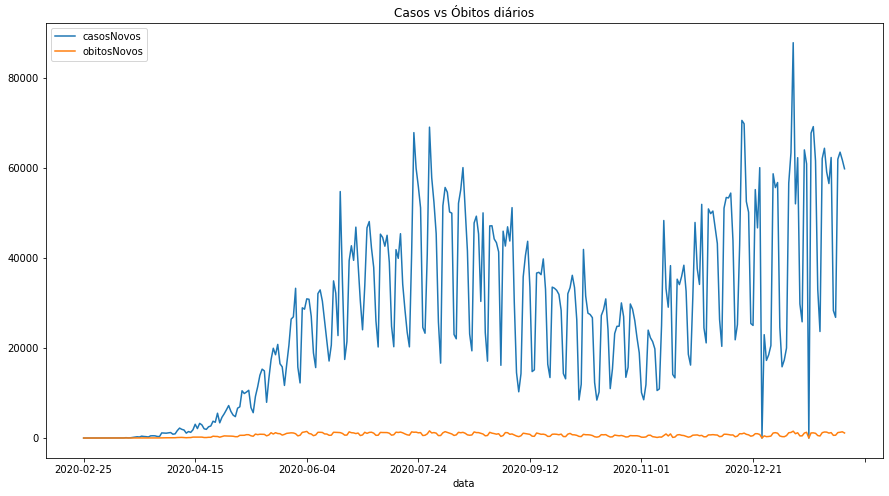

In [5]:
covid_brasil.plot(figsize=(15,8), title="Casos vs Óbitos diários")

### Um novo DataFrame é criado com a média móvel de 7 dias para atenuar as oscilações diárias 

<AxesSubplot:title={'center':'Média móvel de 7 dias'}, xlabel='data'>

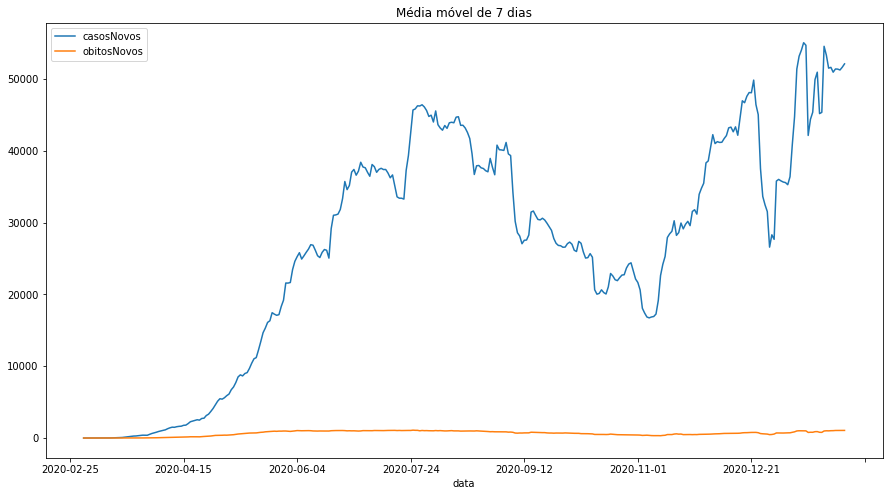

In [6]:
covid_brasil_mv = pd.DataFrame({
    "casosNovos": covid_brasil.casosNovos.rolling(window=7).mean(),
    "obitosNovos": covid_brasil.obitosNovos.rolling(window=7).mean()
})
covid_brasil_mv.set_index(covid_brasil.index)
covid_brasil_mv.plot(figsize=(15,8), title="Média móvel de 7 dias")

## Predição
### Agora serão aplicados dois tipos de regressão: Linear e Polinomial e os resultados serão comparados 